In [9]:
# Matrix diagonalization
# H : Hamiltonian matrix, size : N x N
import numpy as np
import matplotlib.pyplot as plt
def Hamiltonian_diagonalization(H):
    import numpy as np
    # Diagonalize the Hamiltonian matrix
    eigvals, eigvecs = np.linalg.eigh(H)
    # Sort the eigenvalues and eigenvectors in ascending order
    idx = eigvals.argsort()
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]
    return eigvals, eigvecs
def Ham(N,h,theta):
    H=np.zeros((2*N+1,2*N+1))
    for i in range(2*N):
        H[i,i+1]=1/2
        H[i+1,i]=1/2
    for i in range(2*N+1):
        H[i,i]=(((i-N)*h*np.pi+theta)**2)/2
    return H



In [13]:
Hamiltonian=Ham(100,0.1,0)
eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
print(eigvals[0:5])

[-0.84606909 -0.54478987 -0.25718807  0.01555446  0.27178357]


In [66]:
def plot_E_h(h1,h2,theta):
    h=np.arange(h1,h2,(h2-h1)/100)
    E=[]
    for i in h:
        Hamiltonian=Ham(100,i,theta)
        eigvals, eigvecs=Hamiltonian_diagonalization(Hamiltonian)
        E.append(eigvals[0])
    plt.scatter(np.array(h),np.array(E))
    plt.plot(np.array(h),np.array(h)*np.pi/2-1)
    plt.xlabel('h')
    plt.ylabel('E')
    plt.show()
    return h,E

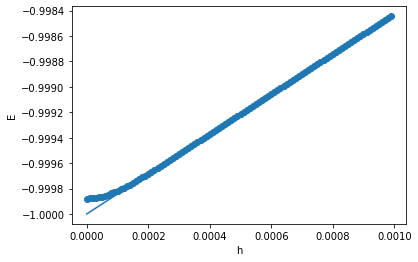

In [67]:
h,E=plot_E_h(1e-7,1e-3,0)